# Lab / HomeWork
## [Artificial Neural Network (ANN)]
## Feedforward Neural Network (FFNN)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Data extraction and choice amount of neurons


In [69]:
data = pd.read_csv("data_ffnn_3classes.txt",header = None,sep=" ")

V_neuron= 3
W_neuron = 3

### Generation matrix Y


In [70]:
data_y = data[2]
length_y = len(data_y)
matrix_y = np.zeros((length_y,3))

def matrixY(y, length):
    for i in range(length):
        if y[i] == 0.0:
            matrix_y[i][0] = 1
        elif y[i] == 1.0:
            matrix_y[i][1] = 1
        elif y[i] == 2.0:
            matrix_y[i][2] = 1
            
matrixY(data_y, length_y)
print("dimension matrix y: " + str(matrix_y.shape))

dimension matrix y: (71, 3)


## Forward Propagation

### Input data matrix []<sub> I x N
I = Number of elements

N = Number of features

In [71]:
def input_matrix_x():
    return np.array([data[0], data[1]])
    
matrix_x = input_matrix_x().transpose()
print("dimension matrix_x: " + str(matrix_x.shape))

dimension matrix_x: (71, 2)


### Extended input data matrix []<sub> I x (N+1)

In [72]:
def x_1_matrix(x_mat):
    ones = np.ones(((np.size(x_mat, 0)),1))
    return np.append(ones, x_mat, axis=1)

matrix_x_extended = x_1_matrix(matrix_x)
print("dimension matrix_x_extended: " + str(matrix_x_extended.shape))

dimension matrix_x_extended: (71, 3)


### Extended input data matrix 2 []<sub> I x K

K = number of hidden neurons

v_matrix = []<sub> (N+1) x K

In [73]:
def x_2_matrix(x_mat_ext, v_neuron):
    return x_mat_ext.dot(v_neuron)

v_neutron_matrix = np.random.rand(np.size(matrix_x_extended, 1), V_neuron)
matrix_x_extended_2 = x_2_matrix(matrix_x_extended, v_neutron_matrix)
print("dimension matrix_x_extended_2: " + str(matrix_x_extended_2.shape))

dimension matrix_x_extended_2: (71, 3)


### Hidden F matrix []<sub> I x K


In [74]:
def f_matrix(x_mat_ext_2):
    return 1/(1 + np.exp(-x_mat_ext_2))
    
matrix_f = f_matrix(matrix_x_extended_2)
print("dimension matrix_f: " + str(matrix_f.shape))

dimension matrix_f: (71, 3)


### Extended hidden f matrix []<sub> I x (K+1)

In [75]:
def f_1_matrix(f_mat):
    ones = np.ones((np.size(f_mat,0),1))
    return np.append(ones, f_mat,axis=1)

matrix_f_extended = f_1_matrix(matrix_f)
print("dimension matrix_f_extended: " + str(matrix_f_extended.shape))

dimension matrix_f_extended: (71, 4)


### Extended hidden f matrix 2 []<sub> I x J

J = output variable dimension

w_matrix = []<sub> (K+1) x J

In [76]:
def f_2_matrix(f_mat_1, w_neuron):
    return f_mat_1.dot(w_neuron)

w_neutron_matrix = np.random.rand(V_neuron+1, W_neuron)
matrix_f_extended_2 = f_2_matrix(matrix_f_extended, w_neutron_matrix)
print("dimension matrix_f_extended_2: " + str(matrix_f_extended_2.shape))

dimension matrix_f_extended_2: (71, 3)


### G matrix []<sub> I x J


In [77]:
def g_matrix(f_mat_ext_2):
    return 1/(1 + np.exp(-f_mat_ext_2))

matrix_g = g_matrix(matrix_f_extended_2)
print("dimension matrix_g: " + str(matrix_g.shape))

dimension matrix_g: (71, 3)


### Sum of squared errors (SSE)

In [78]:
def sum_squared_errors_calculation(g_mat, y_mat):
    squares = (g_mat - y_mat ) ** 2
    return np.sum(squares)/2

sum_squared_errors = sum_squared_errors_calculation(matrix_g, matrix_y)
print("sum_squared_errors: " + str(sum_squared_errors))

sum_squared_errors: 55.973145561491314


## Backwards propagation

### Correction of w matrix

In [79]:
def w_correction(G,Y,F,W,alpha):
    w_matrix_new = np.zeros((np.size(W,0),np.size(W,1)))
    # w of size (k+1)xJ
    for k in range(np.size(W,0)):
        for j in range(np.size(W,1)):
            w = W[k][j]
            err = 0
            for i in range(np.size(G,1)):
                g = G[i][j]
                y = Y[i][j]
                f = F[i][k]
                
                err += (g-y) * g * (1-g) * f
            w_matrix_new[k][j] = w - (alpha*err)
    return w_matrix_new

new_w_mat = w_correction(matrix_g, matrix_y, matrix_f_extended, w_neutron_matrix, 0.5)
print(new_w_mat)

[[0.75091026 0.74391248 0.26026933]
 [0.67643666 0.42163949 0.33305562]
 [0.14872279 0.315901   0.88940396]
 [0.29366112 0.33656013 0.66887536]]


### Correction of v matrix 

In [80]:
def v_correction(g_mat, y_mat, f_mat, w_mat, x_mat_ext, v_mat, alpha):
    v_matrix_new = np.zeros((np.size(v_mat, 0),np.size(v_mat, 1)))
    for n in range(np.size(x_mat_ext, 1)):
        for k in range(np.size(v_mat, 1)):
            v = v_mat[n][k]
            err = 0
            for i in range(np.size(g_mat, 0)):
                f = f_mat[i][k]
                x_ext = x_mat_ext[i][n]
                
                for j in range(np.size(g_mat, 1)):
                    g = g_mat[i][j]
                    y = y_mat[i][j]
                    w = w_mat[k][j]
                    err += (g-y) * g * (-g) * w * f * (1-f) * x_ext
            v_matrix_new[n][k] = v - (alpha*err)
    return v_matrix_new

new_v_mat = v_correction(matrix_g, matrix_y, matrix_f, w_neutron_matrix, matrix_x_extended, v_neutron_matrix, 0.5)
print(new_v_mat)
        

[[2.46732147 1.83834583 2.67321107]
 [6.17146711 2.82516833 5.20900543]
 [4.56220617 2.90739841 6.74813422]]


## Learning Loop

In [81]:
error_history = []

def FFNN(x_ext, y_mat, g_mat, w_mat, v_mat, f_mat, alpha, iter = 5000):
    new_v = v_mat
    new_x_ext = x_ext
    new_g = g_mat
    new_w = w_mat
    new_f = f_mat
    i=0
    while i <= iter:
        new_v = v_correction(new_g, y_mat, new_f, new_w, new_x_ext, new_v, alpha)
        
        x_mat_ext_2 = x_2_matrix(new_x_ext, new_v)
        
        new_f = f_matrix(x_mat_ext_2)
        f_mat_ext_1 = f_1_matrix(new_f)
        
        new_w = w_correction(new_g, y_mat, f_mat_ext_1, new_w, alpha*2)
        
        f_mat_ext_2 = f_2_matrix(f_mat_ext_1, new_w)
        
        new_g = g_matrix(f_mat_ext_2)
        
        err = sum_squared_errors_calculation(new_g, matrix_y)
        error_history.append(err)
        
        i +=1
    return  new_g

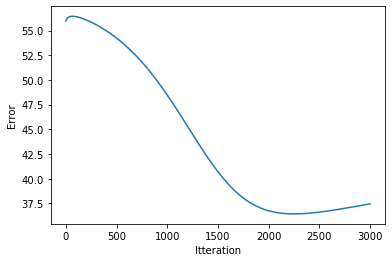

[[0.22852921 0.89830082 0.25485742]
 [0.22857021 0.89827939 0.25487126]
 [0.22847305 0.89832578 0.25484927]
 [0.22852773 0.89829808 0.25486547]
 [0.22852751 0.89829528 0.25487233]
 [0.22848083 0.89832007 0.25485581]
 [0.22850198 0.89831013 0.2548602 ]
 [0.22845949 0.89833167 0.25484765]
 [0.22850434 0.89831061 0.25485688]
 [0.22848795 0.89831918 0.25485138]
 [0.22848029 0.89832159 0.25485267]
 [0.22855654 0.89828173 0.25487822]
 [0.2285976  0.89826784 0.25487379]
 [0.22852076 0.89830396 0.25485769]
 [0.22856323 0.89828082 0.25487426]
 [0.22847445 0.89832483 0.25485026]
 [0.22847163 0.89832564 0.25485092]
 [0.22847655 0.89832263 0.25485362]
 [0.22850622 0.89830711 0.25486354]
 [0.22853872 0.89829177 0.25487049]
 [0.22888869 0.89812451 0.25495102]
 [0.22876967 0.89817882 0.25492975]
 [0.22897432 0.89807037 0.25500259]
 [0.2288448  0.89813335 0.25497003]
 [0.22874477 0.89818739 0.25493199]
 [0.22868195 0.89821446 0.25492453]
 [0.2287084  0.89819596 0.25494453]
 [0.22908077 0.89799249 0.25

In [82]:
def show_error_log():
    plt.plot(error_history)
    plt.ylabel("Error")
    plt.xlabel("Itteration")
    plt.show()

error_history.append(sum_squared_errors)

result = FFNN(matrix_x_extended, matrix_y, matrix_g, w_neutron_matrix, v_neutron_matrix, matrix_f, 0.0005, iter=3000)
show_error_log()
print(result)